In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(test_images, test_labels))


Epoch 1/30
1875/1875 [==============================] - 75s 39ms/step - loss: 0.4944 - accuracy: 0.8177 - val_loss: 0.3624 - val_accuracy: 0.8672
Epoch 2/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3169 - accuracy: 0.8846 - val_loss: 0.3155 - val_accuracy: 0.8845
Epoch 3/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2716 - accuracy: 0.8992 - val_loss: 0.3027 - val_accuracy: 0.8910
Epoch 4/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2437 - accuracy: 0.9101 - val_loss: 0.2908 - val_accuracy: 0.8940
Epoch 5/30
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2190 - accuracy: 0.9198 - val_loss: 0.2759 - val_accuracy: 0.9006
Epoch 6/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1998 - accuracy: 0.9256 - val_loss: 0.2675 - val_accuracy: 0.9049
Epoch 7/30
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1825 - accuracy: 0.9322 - val_loss: 0.2819 -

313/313 - 2s - loss: 0.5535 - accuracy: 0.9025 - 2s/epoch - 7ms/step

Test accuracy: 0.9024999737739563


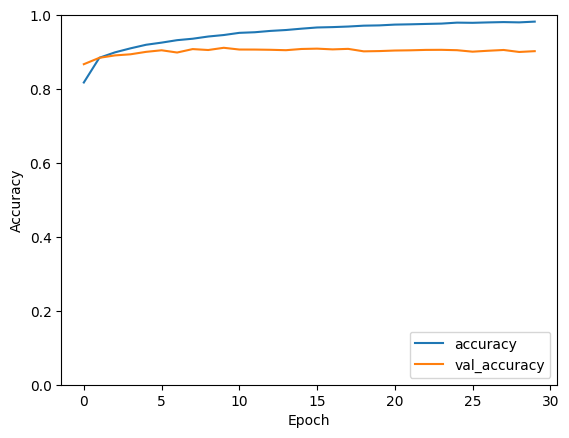

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Графік точності та втрат під час навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Згорткові мережі (CNNs) працюють добре: У вас є підтвердження того, що згорткові нейронні мережі (CNNs) добре працюють для завдань класифікації зображень, таких як Fashion MNIST. Їхні здатності до виділення ознак на різних рівнях абстракції роблять їх ефективними для аналізу текстур і форм одягу.

Архітектура мережі має значення: Оптимальна архітектура мережі може суттєво впливати на результати. Зазвичай починають з кількох згорткових і пулінгових шарів, додавання більше шарів або зменшення їх кількості може вплинути на точність.

Функції активації: Використання функції активації "relu" в згорткових шарах є популярним вибором, але можна спробувати інші функції активації, такі як "Leaky ReLU" або "ELU", щоб покращити результати.

Кількість фільтрів і розмір ядра: Зміна кількості фільтрів та розміру ядра згорткового шару може впливати на здатність мережі виділяти ознаки. Експериментуйте з цими параметрами, щоб підібрати їх оптимальні значення.

Пулінг: Додавання пулінгових шарів може допомогти зменшити кількість параметрів та обчислень у мережі, але не завжди є необхідним.

Регуляризація та викиди: Регуляризація, така як викиди і регуляризація ваг, може допомогти уникнути перенавчання моделі.

Оптимізатори та швидкість навчання: Вибір оптимізатора і рівня швидкості навчання може впливати на збіжність моделі. Adam часто є хорошим вибором, але інші оптимізатори, такі як RMSprop або SGD, також варто спробувати.

Збільшення даних: Збільшення навчальних даних за допомогою аугментації може покращити точність моделі.

Ансамблі моделей: Використання ансамблів декількох моделей (наприклад, згорткових мереж) може підвищити точність класифікації.

Гіперпараметри: Експериментуйте з іншими гіперпараметрами, такими як кількість епох навчання, розмір пакету (batch size) і так далі.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [3]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# Збільшення розміру зображень з 28x28 до 48x48 та додавання каналу RGB
train_images = tf.image.grayscale_to_rgb(tf.image.resize(train_images, (48, 48)))
test_images = tf.image.grayscale_to_rgb(tf.image.resize(test_images, (48, 48)))

In [5]:
# Масштабування пікселів до діапазону [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
# Згорткова основа VGG16
vgg_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(48, 48, 3))  # Змініть розмір входу на (48, 48, 3)

58889256/58889256 [==============================] - 3s 0us/step


In [7]:
# Створення моделі
model = models.Sequential()
model.add(vgg_base)  # Додавання VGG16 як згорткової основи
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
# Замороження згорткової основи (опціонально)
vgg_base.trainable = False

In [9]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
epochs = 20  # Зменшити кількість епох
batch_size = 512  # Зменшити розмір батча
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/20
118/118 [==============================] - 1930s 16s/step - loss: 0.8745 - accuracy: 0.7014 - val_loss: 0.5213 - val_accuracy: 0.8144
Epoch 2/20
118/118 [==============================] - 1917s 16s/step - loss: 0.5212 - accuracy: 0.8152 - val_loss: 0.4540 - val_accuracy: 0.8353
Epoch 3/20
118/118 [==============================] - 1857s 16s/step - loss: 0.4626 - accuracy: 0.8352 - val_loss: 0.4222 - val_accuracy: 0.8480
Epoch 4/20
118/118 [==============================] - 1911s 16s/step - loss: 0.4291 - accuracy: 0.8463 - val_loss: 0.4031 - val_accuracy: 0.8550
Epoch 5/20
118/118 [==============================] - 1911s 16s/step - loss: 0.4064 - accuracy: 0.8537 - val_loss: 0.3876 - val_accuracy: 0.8621
Epoch 6/20
118/118 [==============================] - 1908s 16s/step - loss: 0.3905 - accuracy: 0.8597 - val_loss: 0.3800 - val_accuracy: 0.8618
Epoch 7/20
118/118 [==============================] - 1853s 16s/step - loss: 0.3800 - accuracy: 0.8623 - val_loss: 0.3724 - val_ac

In [11]:
# Оцінка та візуалізація результатів
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 256s - loss: 0.3354 - accuracy: 0.8800 - 256s/epoch - 818ms/step

Test accuracy: 0.8799999952316284


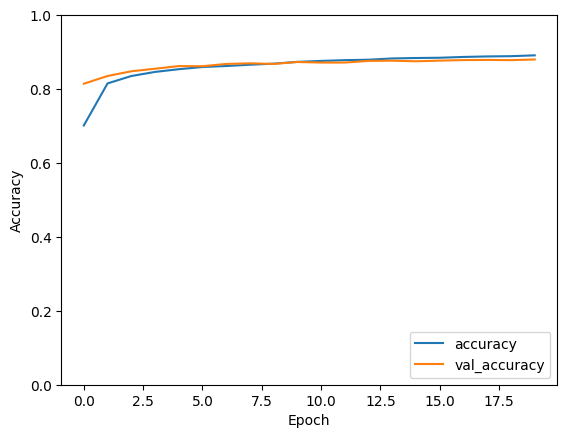

In [12]:
# Графік точності та втрат під час навчання

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()